<a href="https://colab.research.google.com/github/BradleyAgwa/WEEK-7-IP/blob/main/Moringa_Data_Science_Core_W7_Independent_Project_2022_2_Bradley_Agwa_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**HASS CONSULTING COMPANY WEEK 7 IP**

As a Data Scientist, you work for Hass Consulting Company which is a real estate leader with over 25 years of experience. You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

## 1.0 Defining the Question


The main objective is to determine factors affecting prices of houses and developing a model to effectively predict the sale prices.

## 1.1 Defining the metric of success

* Developing a model that can predict the prices of houses.
* Determine factors affecting price of houses.

## 1.2 Business Understanding

1.   Business Needs- Hass Consulting Company which is a real estate that wants to figure out the factors that affect housing prices using the given information on real estate properties that was collected over the past few months, while also getting a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables.  

2.   Data Science Objective- I need to build a model which predicts, with a high-level accuracy, he prices of houses.

## 1.3 The Experimental Design

1. Importing the libraries

2. Loading the data

3. Data Cleaning

4. Exploratory analysis

5. Multiple Linear Regression

    Checking multicollinearity

    Residual plots

    Assess Heteroskedasticity using Barlett's test.

6. Quantile Regression

7. Ridge Regression

8. Lassor Regression

9. Elastic Net Regression

10. Conclusion

## 2.0 Data Understanding

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

%matplotlib inline

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import scipy.stats as stats
import scipy as sp

from sklearn.decomposition import PCA
import statsmodels.formula.api as sm
from statsmodels.regression.quantile_regression import QuantReg

### Loading the dataset

In [2]:
# Loading the dataset
df = pd.read_csv('http://bit.ly/IndependentProjectWeek7Dataset')
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
# Previewing bottom of the dataset

df.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [4]:
# Checking the shape

df.shape

(21613, 20)

In [5]:
# Checking the data types

df.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [6]:
# Getting column information and data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

## 3.0 Data Cleaning

In [7]:
# Checking column names

df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [8]:
# Renaming the columns into a uniform system

df.columns=df.columns.str.strip().str.lower().str.replace(' ','_').str.replace('(','').str.replace(')','')
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [9]:
# Dropping the columns that shall not be utilized in this analysis

df1=df

df1.drop(['zipcode','lat','long'], inplace=True,axis=1)

In [10]:
df1.drop(['id'],inplace=True,axis=1)

In [11]:
# Run a check for the new dataframe

df1.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650


In [12]:
# Checking for null values

df1.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
sqft_living15    0
sqft_lot15       0
dtype: int64

> No null values present


In [13]:
# Checking for duplicates

df1.duplicated().sum()


6

In [14]:
# Dropping the duplicates

df1.drop_duplicates(inplace=True)

# Confirming the duplicates have been droped

df1.duplicated().sum()

0

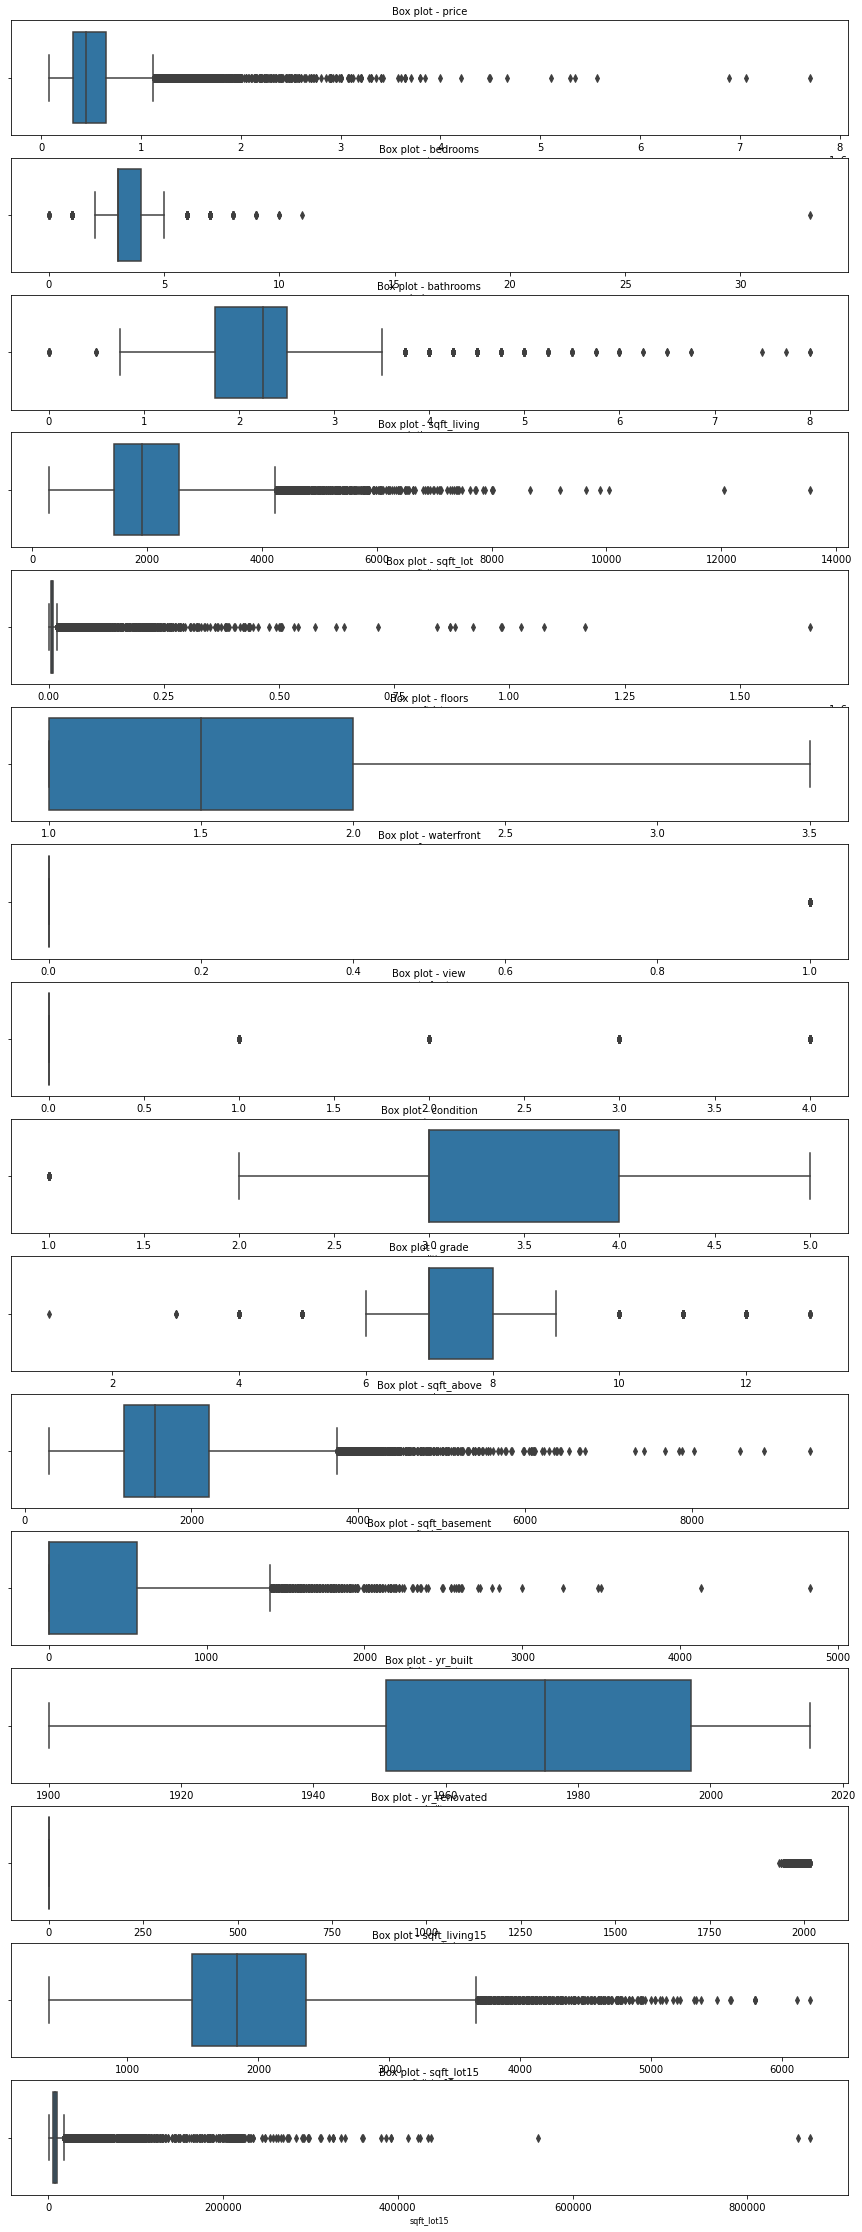

In [15]:
# Checking for outliers
cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated',
       'sqft_living15', 'sqft_lot15']
fig, ax = plt.subplots(len(cols), figsize=(15,40))

for i, col_val in enumerate(cols):
    sns.boxplot(df1[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
plt.show()

In [16]:
# Checking for outliers using quantiles

cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated',
       'sqft_living15', 'sqft_lot15']
Q1 = df1[cols].quantile(0.25)
Q3 = df1[cols].quantile(0.75)
IQR = Q3 -Q1
outliers = df1[cols][((df[cols] < (Q1 - 1.5 * IQR)) |(df1[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
outliers.shape

(6543, 16)

In [17]:
# Creating a new dataset without outliers

dt = df1[cols][~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
dt.shape

(15064, 16)

It won't be sensible to drop the outliers as we will lose most records and as such we wont be able to create a credible model.

Since the year renovated had a lot of 0 values, we are going to perform a slight change to the columns to show 0 for those note renovated and 1 for those that were renovated.

In [18]:
# The renovated column change

df1.loc[df1['yr_renovated']==0,'yr_renovated']=0
df1.loc[df1['yr_renovated']>0,'yr_renovated']=1

In [19]:
# Confirming the changes 

df1.yr_renovated.value_counts()

0    20694
1      913
Name: yr_renovated, dtype: int64

## 4.0 Exploratory Data Analysis

#### Univariate Analysis

In [20]:
# Getting the statistical summaries

df1.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,2.160700e+04,21607.000000,21607.000000,21607.000000,2.160700e+04,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000
mean,5.402008e+05,3.370852,2.114720,2079.954783,1.511019e+04,1.494122,0.007544,0.234230,3.409497,7.656639,1788.397186,291.557597,1970.997917,0.042255,1986.591799,12770.571991
std,3.674061e+05,0.930058,0.770252,918.526856,4.142579e+04,0.539912,0.086529,0.766185,0.650791,1.175508,828.156250,442.618358,29.370686,0.201175,685.436161,27307.553760
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,399.000000,651.000000
25%,3.217250e+05,3.000000,1.750000,1428.500000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.069200e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,2360.000000,10083.500000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,1.000000,6210.000000,871200.000000


In [21]:
# Measures  of distribution

for i in cols:
  print(i)
  print("The skewness is:", df1[i].skew())
  print("The kurtosis is:", df1[i].kurt())
  s= abs(df1[i].skew())
  if s > 1:
    print('Highly skewed distribution')
  else:
    print('')
  k = df1[i].kurt()
  if k >3:
    print('Heavy-tailed Distribution(Leptokurtic)')
  elif k < 3:
    print('Light tailed Distribution(Platykurtic)')
  print("******"*8)

price
The skewness is: 4.021266197038476
The kurtosis is: 34.514117297011055
Highly skewed distribution
Heavy-tailed Distribution(Leptokurtic)
************************************************
bedrooms
The skewness is: 1.9747321980772032
The kurtosis is: 49.07820461502534
Highly skewed distribution
Heavy-tailed Distribution(Leptokurtic)
************************************************
bathrooms
The skewness is: 0.5112068282126112
The kurtosis is: 1.279210081383435

Light tailed Distribution(Platykurtic)
************************************************
sqft_living
The skewness is: 1.4714479897213968
The kurtosis is: 5.241861983397861
Highly skewed distribution
Heavy-tailed Distribution(Leptokurtic)
************************************************
sqft_lot
The skewness is: 13.058428974458002
The kurtosis is: 285.00700256535833
Highly skewed distribution
Heavy-tailed Distribution(Leptokurtic)
************************************************
floors
The skewness is: 0.6164550662875149
The ku

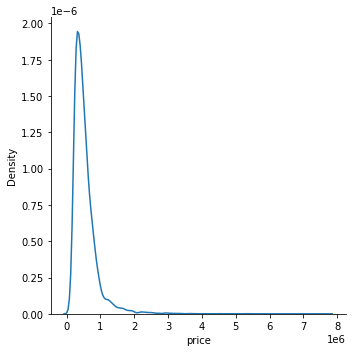

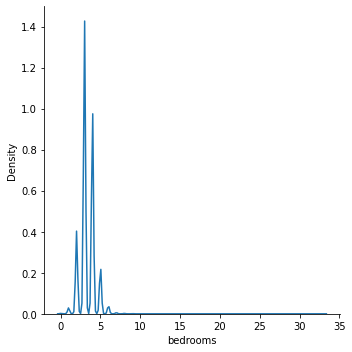

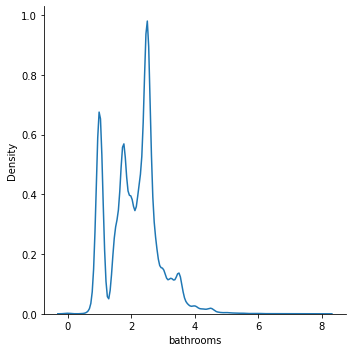

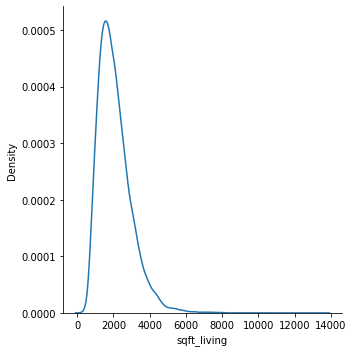

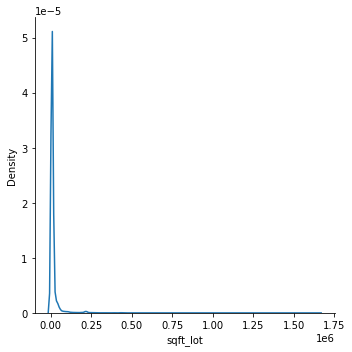

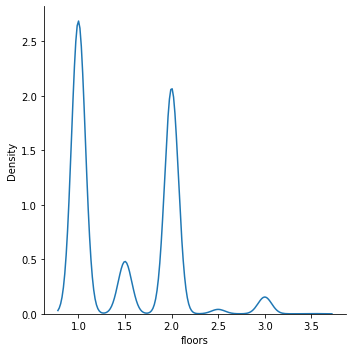

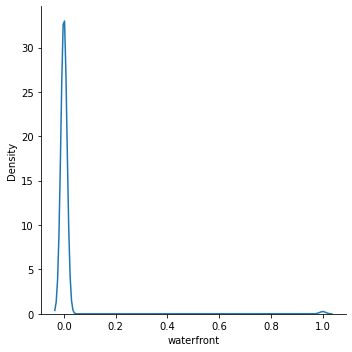

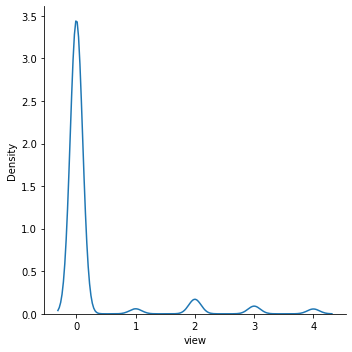

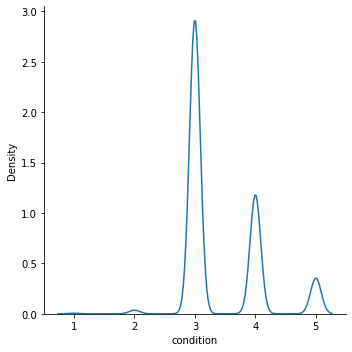

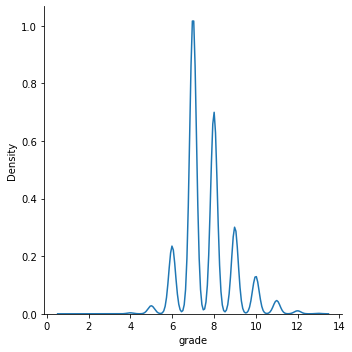

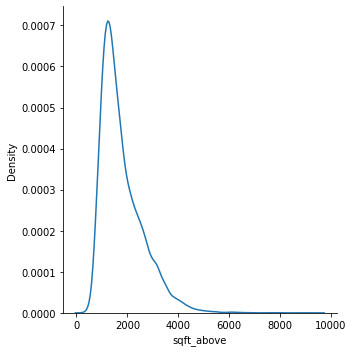

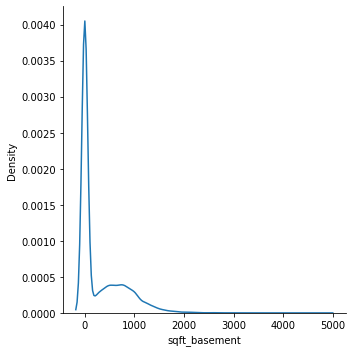

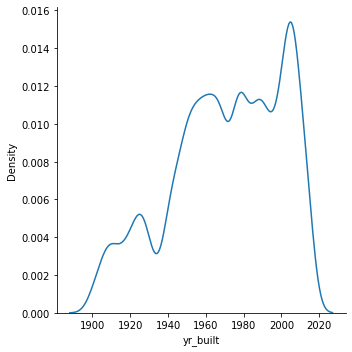

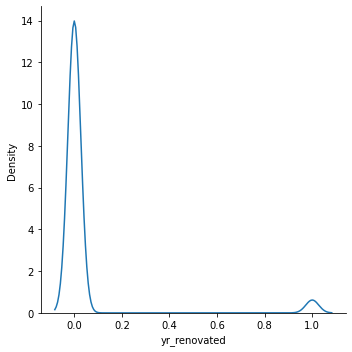

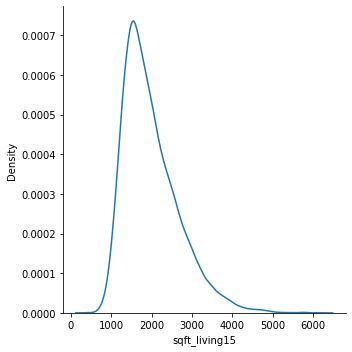

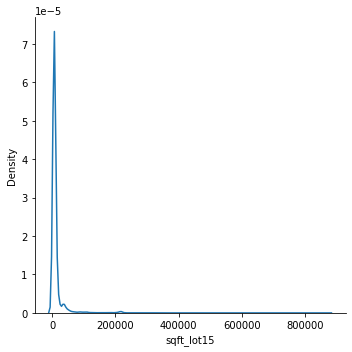

In [22]:
# Distribution plots for the data.

for i in cols:
  sns.displot(df1[i],kind="kde")


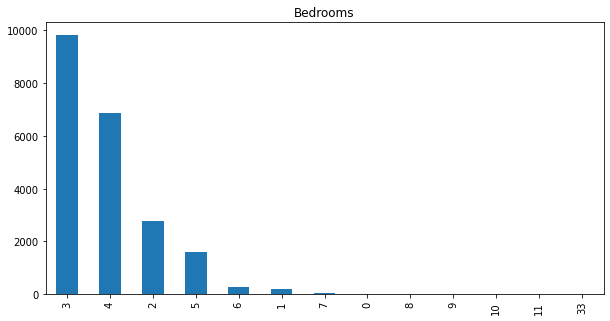

In [23]:
# Bedrooms variable plot bar
#
plt.figure(figsize = (10, 5))
plt.title('Bedrooms')
df1['bedrooms'].value_counts().plot.bar();

3 bedroom houses had the most records.

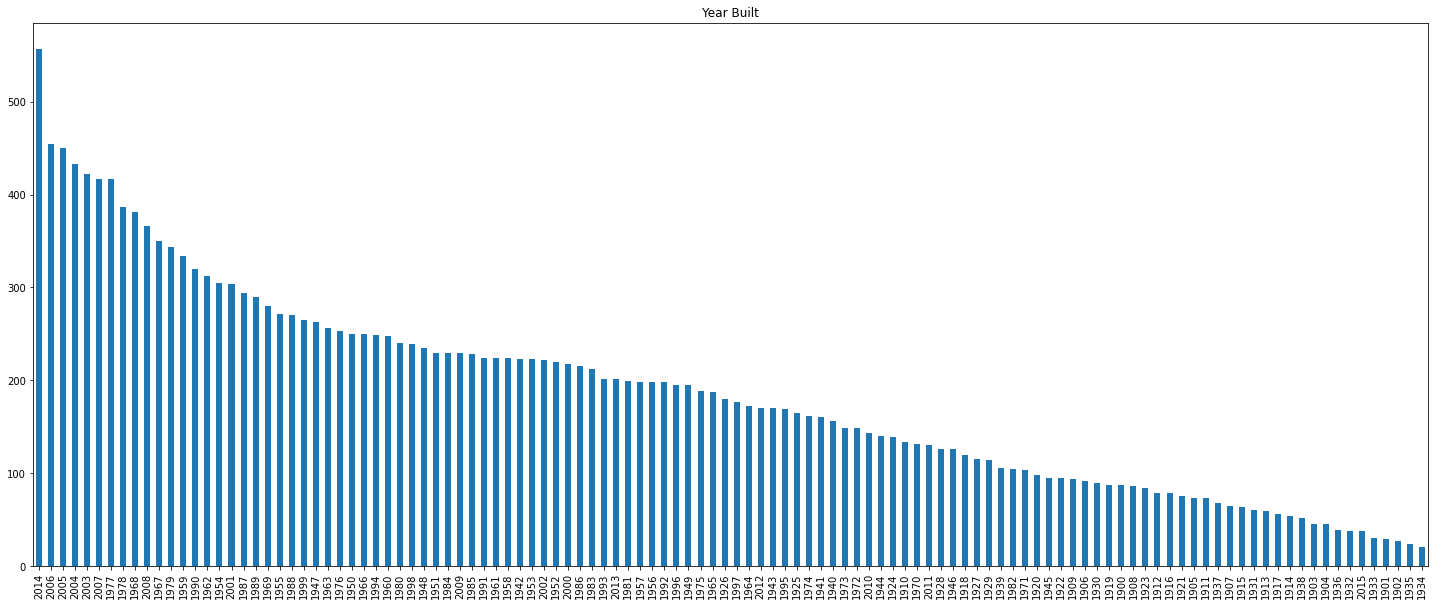

In [24]:
# Bar graph showing the year the houses were built
#
plt.figure(figsize=(25,10))
plt.title('Year Built')
df1['yr_built'].value_counts().plot.bar();

Most houses were built in 2014 than any other year.

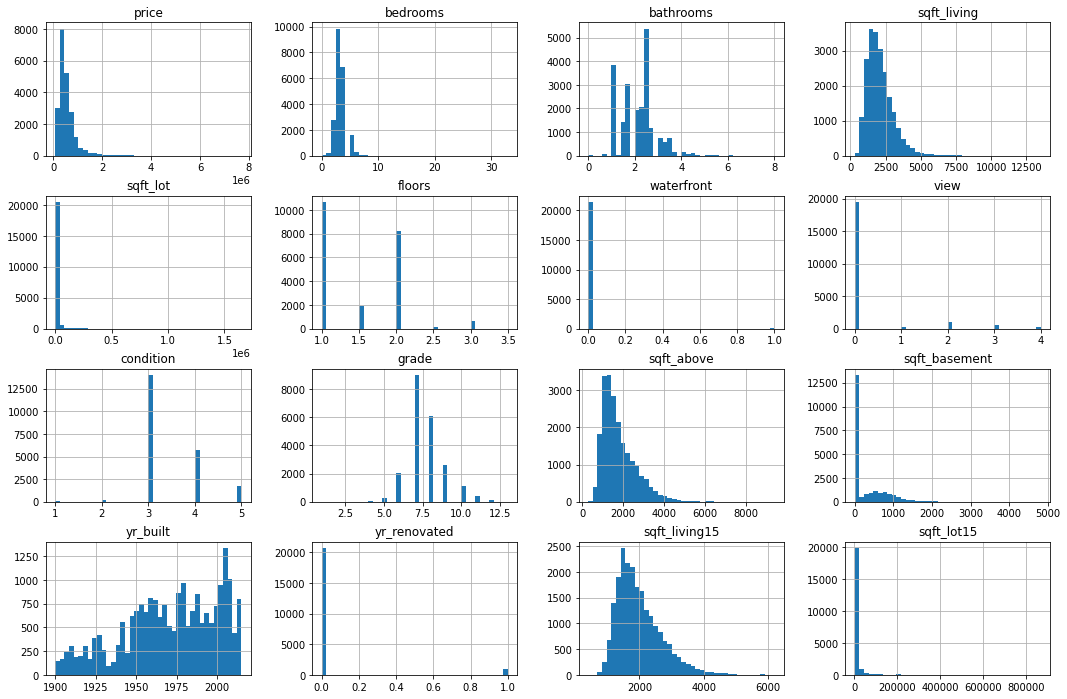

In [25]:
# Histogams for all numerical variables

df1.hist(bins=40, figsize=(18,12))
plt.show()

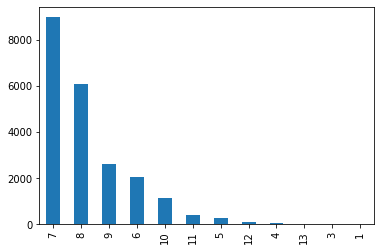

In [26]:
# Bar graph showing house grades

df1['grade'].value_counts().plot.bar()

There were more grade 7 houses than any other grade

#### Bivariate Analysis

In [27]:

df1.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
price,1.000000,0.308378,0.525160,0.702050,0.089641,0.256913,0.266332,0.397458,0.036361,0.667581,0.605574,0.323851,0.054068,0.126153,0.585371,0.082436
bedrooms,0.308378,1.000000,0.515955,0.576673,0.031697,0.175548,-0.006584,0.079442,0.028423,0.357145,0.477568,0.303171,0.154310,0.018407,0.391621,0.029229
bathrooms,0.525160,0.515955,1.000000,0.754720,0.087759,0.500745,0.063749,0.187901,-0.124929,0.665028,0.685373,0.283843,0.506032,0.050407,0.568703,0.087202
sqft_living,0.702050,0.576673,0.754720,1.000000,0.172811,0.354184,0.103817,0.284630,-0.058822,0.762893,0.876595,0.435068,0.318262,0.055030,0.756401,0.183260
sqft_lot,0.089641,0.031697,0.087759,0.172811,1.000000,-0.005100,0.021597,0.074740,-0.008996,0.113693,0.183515,0.015254,0.053177,0.007770,0.144593,0.718551
floors,0.256913,0.175548,0.500745,0.354184,-0.005100,1.000000,0.023735,0.029397,-0.263708,0.458071,0.524110,-0.245625,0.489215,0.006122,0.280098,-0.011164
waterfront,0.266332,-0.006584,0.063749,0.103817,0.021597,0.023735,1.000000,0.401992,0.016645,0.082800,0.072078,0.080582,-0.026146,0.093358,0.086465,0.030697
view,0.397458,0.079442,0.187901,0.284630,0.074740,0.029397,0.401992,1.000000,0.045811,0.251431,0.167650,0.276987,-0.053178,0.103339,0.280389,0.072561
condition,0.036361,0.028423,-0.124929,-0.058822,-0.008996,-0.263708,0.016645,0.045811,1.000000,-0.144592,-0.158262,0.174045,-0.361284,-0.060406,-0.092929,-0.003460
grade,0.667581,0.357145,0.665028,0.762893,0.113693,0.458071,0.082800,0.251431,-0.144592,1.000000,0.756089,0.168494,0.446891,0.013991,0.713403,0.119324


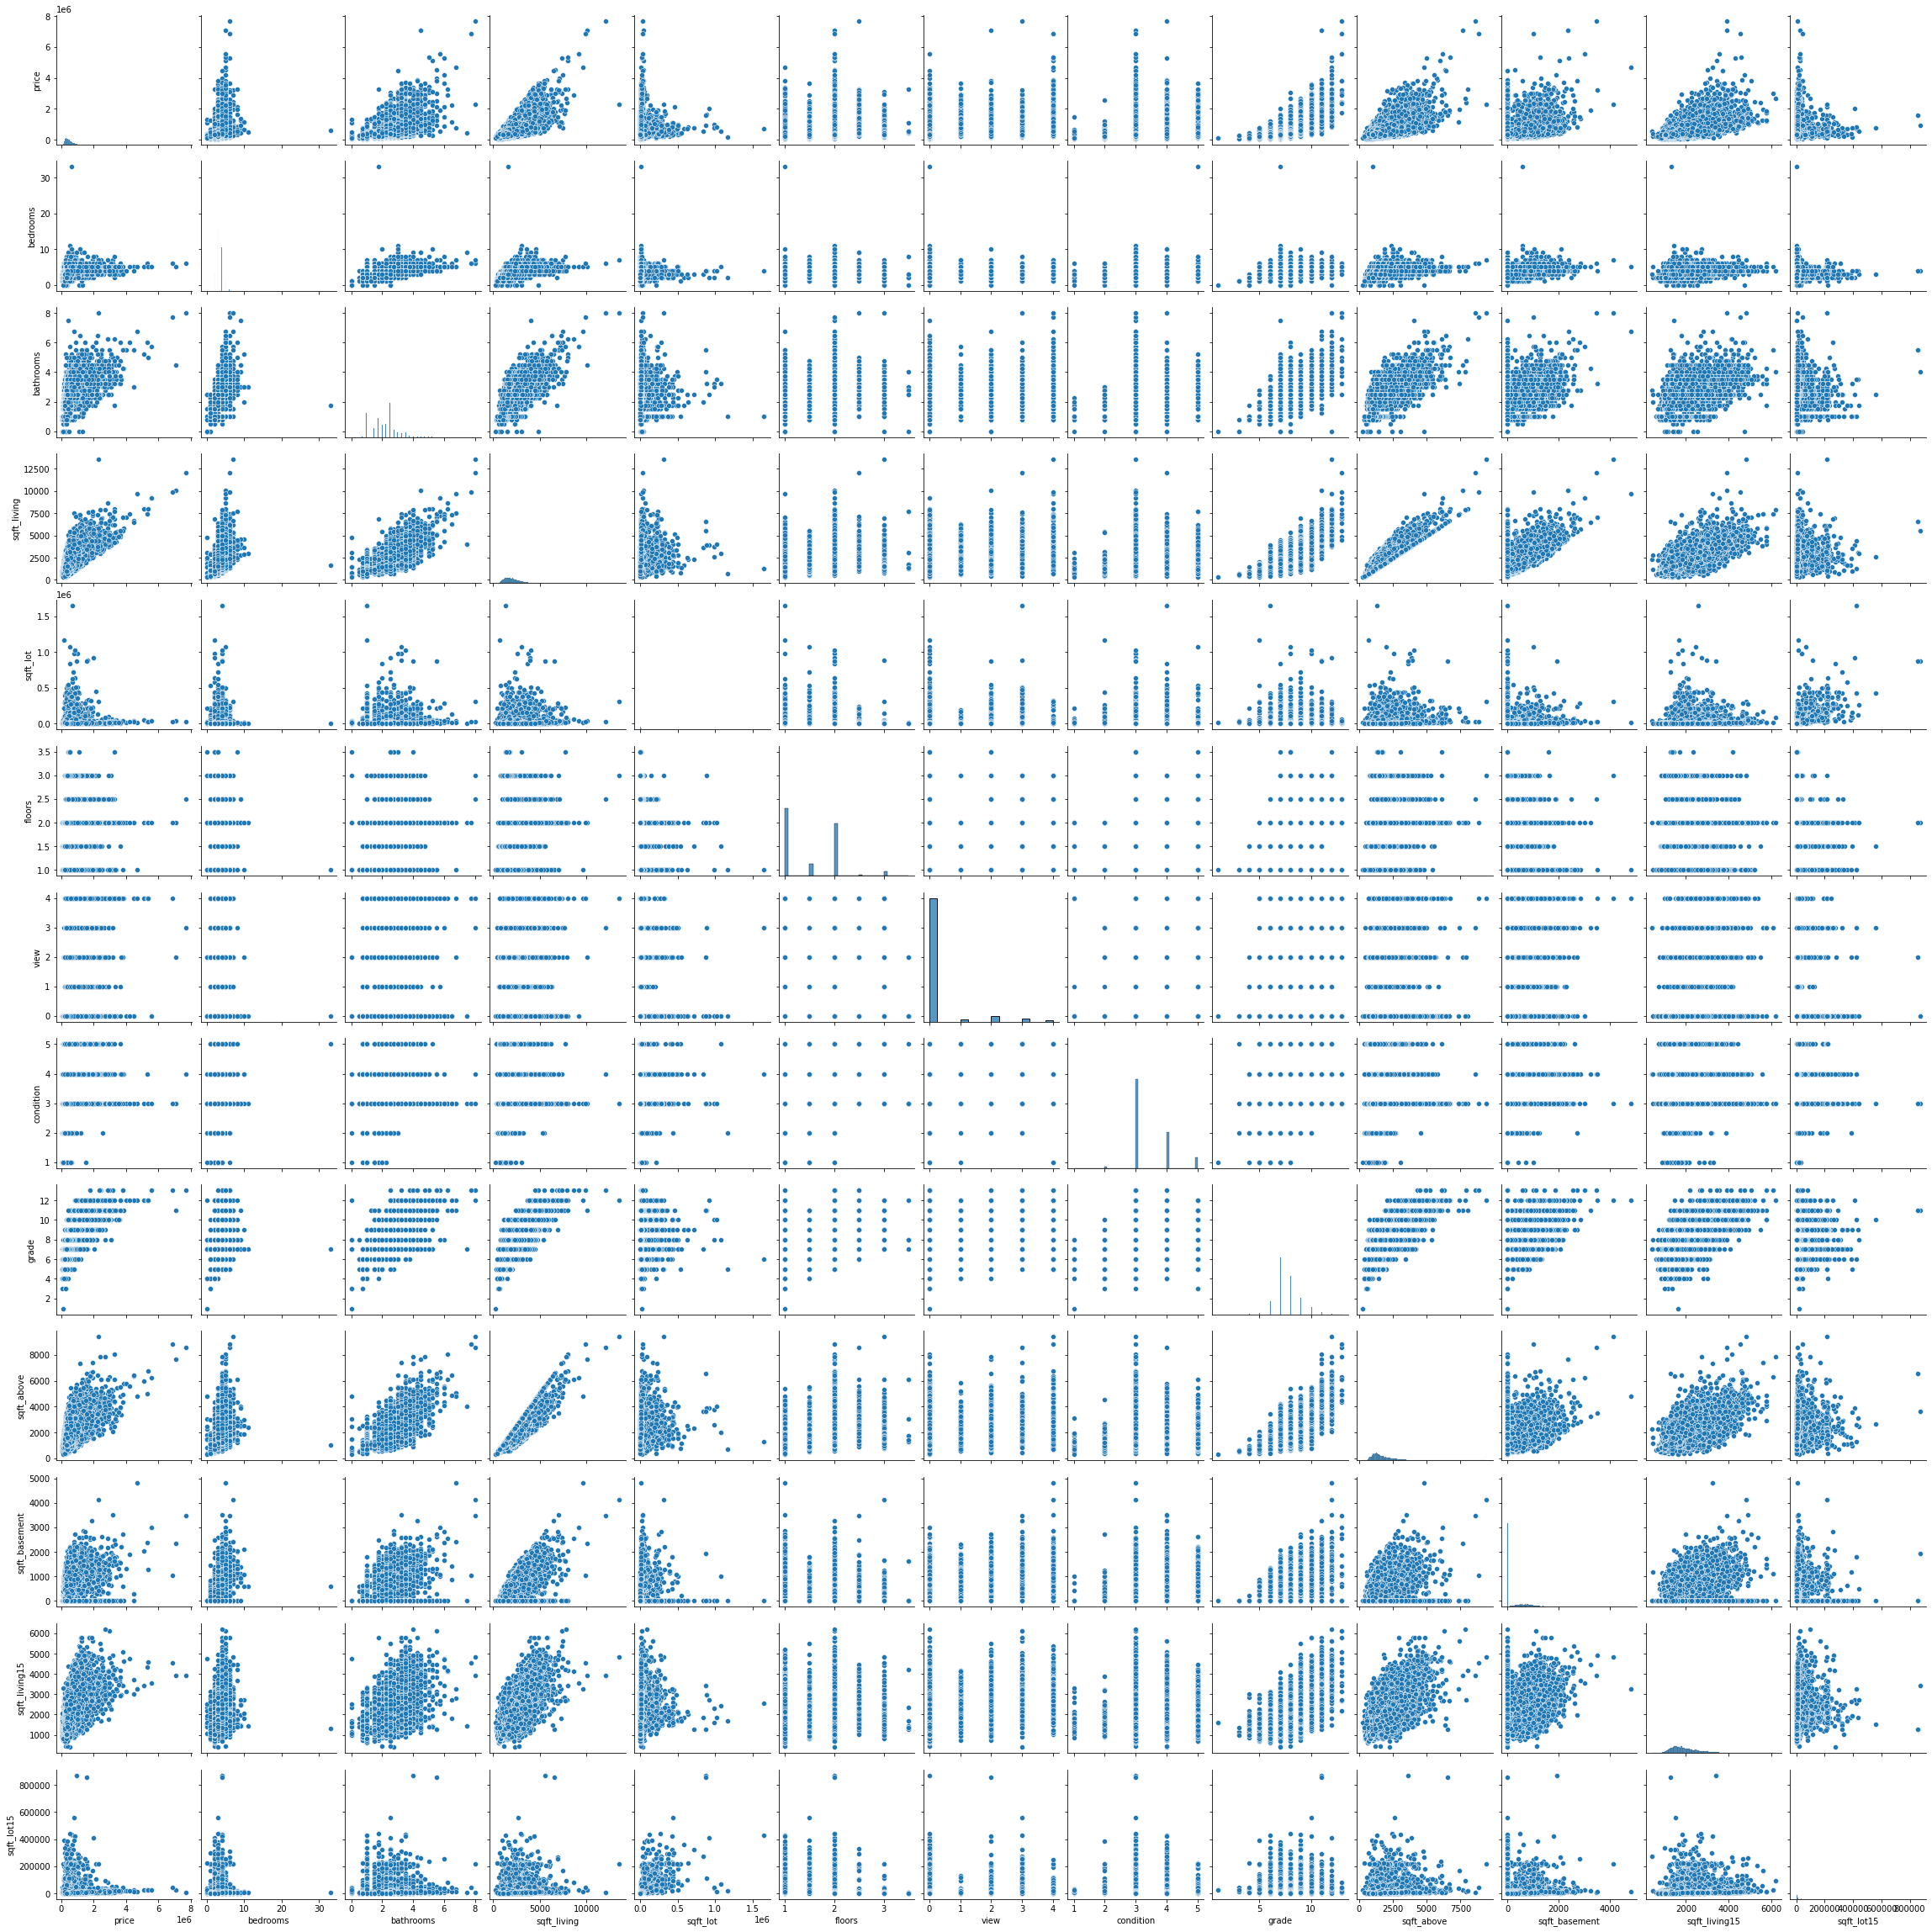

In [28]:
# Scatter plots on numeric variables to visualize correlations
#
numericals = df1[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','floors', 'view', 'condition', 'grade', 'sqft_above','sqft_basement','sqft_living15', 'sqft_lot15']]
sns.pairplot(numericals)
plt.show()

Most variables have a linear relationship although not entirerly continous for some

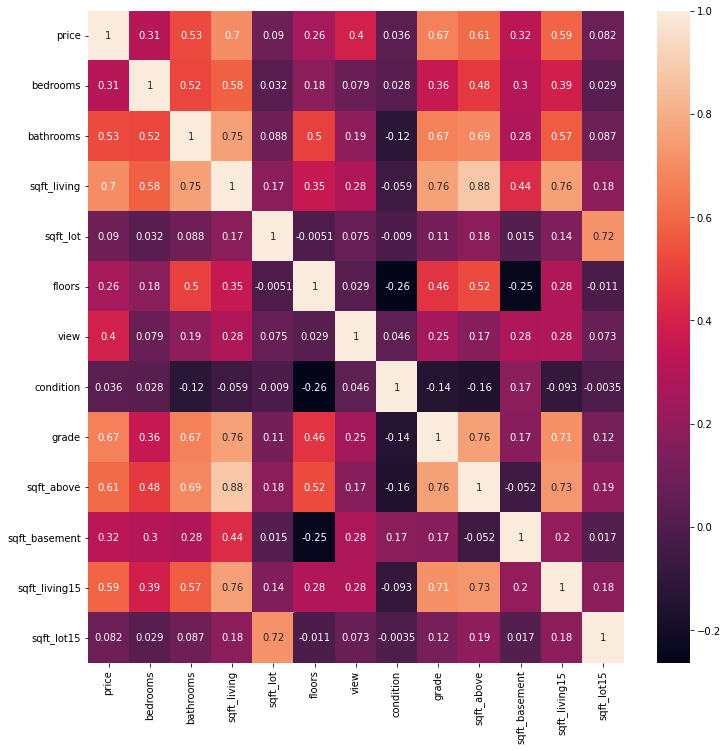

In [29]:
# Vizualising the correlation matrix using a heat map
#
plt.figure(figsize=(12, 12))
sns.heatmap(numericals.corr(), annot=True)
plt.show()

Sqft living, sqft above, and bathrooms had the highest positive correltion with price

## 5.0 Regression Analysis

### Multiple Linear Regression

#### Multicollinearity

In [30]:
# First we check for multicollinearity 

# displaying the correlation matrix of the data frame to show correlation btn variables 

corrs = df1.corr()
corrs

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
price,1.000000,0.308378,0.525160,0.702050,0.089641,0.256913,0.266332,0.397458,0.036361,0.667581,0.605574,0.323851,0.054068,0.126153,0.585371,0.082436
bedrooms,0.308378,1.000000,0.515955,0.576673,0.031697,0.175548,-0.006584,0.079442,0.028423,0.357145,0.477568,0.303171,0.154310,0.018407,0.391621,0.029229
bathrooms,0.525160,0.515955,1.000000,0.754720,0.087759,0.500745,0.063749,0.187901,-0.124929,0.665028,0.685373,0.283843,0.506032,0.050407,0.568703,0.087202
sqft_living,0.702050,0.576673,0.754720,1.000000,0.172811,0.354184,0.103817,0.284630,-0.058822,0.762893,0.876595,0.435068,0.318262,0.055030,0.756401,0.183260
sqft_lot,0.089641,0.031697,0.087759,0.172811,1.000000,-0.005100,0.021597,0.074740,-0.008996,0.113693,0.183515,0.015254,0.053177,0.007770,0.144593,0.718551
floors,0.256913,0.175548,0.500745,0.354184,-0.005100,1.000000,0.023735,0.029397,-0.263708,0.458071,0.524110,-0.245625,0.489215,0.006122,0.280098,-0.011164
waterfront,0.266332,-0.006584,0.063749,0.103817,0.021597,0.023735,1.000000,0.401992,0.016645,0.082800,0.072078,0.080582,-0.026146,0.093358,0.086465,0.030697
view,0.397458,0.079442,0.187901,0.284630,0.074740,0.029397,0.401992,1.000000,0.045811,0.251431,0.167650,0.276987,-0.053178,0.103339,0.280389,0.072561
condition,0.036361,0.028423,-0.124929,-0.058822,-0.008996,-0.263708,0.016645,0.045811,1.000000,-0.144592,-0.158262,0.174045,-0.361284,-0.060406,-0.092929,-0.003460
grade,0.667581,0.357145,0.665028,0.762893,0.113693,0.458071,0.082800,0.251431,-0.144592,1.000000,0.756089,0.168494,0.446891,0.013991,0.713403,0.119324


In [31]:
# Checking the VIF
 
VIF = pd.DataFrame(np.linalg.inv(corrs.values), index= corrs.index, columns= corrs.columns)
VIF

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
price,2.888649,0.287515,-0.276901,-9.464532e+00,0.000682,-0.114452,-0.393762,-0.261390,-0.099998,-1.107730,7.526813e+00,3.980829e+00,0.825169,-0.031980,-0.133918,0.118111
bedrooms,0.287515,1.672812,-0.488673,9.437702e-01,0.044641,0.059315,0.022181,0.091541,-0.074904,0.215909,-1.797041e+00,-9.654862e-01,0.175208,0.036968,-0.000933,0.093850
bathrooms,-0.276901,-0.488673,3.374693,7.030366e+00,-0.019196,-0.670897,0.047338,-0.014211,-0.126760,-0.182640,-7.455428e+00,-4.404407e+00,-0.995170,-0.254358,0.109014,0.065231
sqft_living,-9.575909,0.880227,7.076792,5.679877e+14,-1.935382,0.564474,2.199971,-1.193861,0.036021,13.222634,-5.121054e+14,-2.737011e+14,-5.584400,-0.889502,-1.685074,2.442505
sqft_lot,0.000682,0.044641,-0.019196,-2.036834e+00,2.088084,0.074203,0.028158,-0.052056,0.019091,-0.006401,1.599080e+00,9.582892e-01,0.026265,0.012279,0.127108,-1.474681
floors,-0.114452,0.059315,-0.670897,4.949764e-01,0.074203,1.936432,0.011690,-0.052444,0.136832,-0.281913,-8.425003e-01,3.421571e-01,-0.333953,-0.055955,0.363880,0.096471
waterfront,-0.393762,0.022181,0.047338,2.176921e+00,0.028158,0.011690,1.257027,-0.457916,-0.001677,0.198950,-1.930828e+00,-9.735008e-01,-0.134629,-0.062288,0.075471,-0.033043
view,-0.261390,0.091541,-0.014211,-1.149988e+00,-0.052056,-0.052444,-0.457916,1.427985,0.000933,-0.084173,1.179898e+00,3.351529e-01,0.124242,-0.031292,-0.251897,-0.008700
condition,-0.099998,-0.074904,-0.126760,5.226622e-02,0.019091,0.136832,-0.001677,0.000933,1.224870,0.022048,2.190750e-02,-7.455373e-02,0.443830,0.195537,0.040622,-0.041986
grade,-1.107730,0.215909,-0.182640,1.351421e+01,-0.006401,-0.281913,0.198950,-0.084173,0.022048,3.660868,-1.327970e+01,-6.850449e+00,-0.712739,-0.027735,-0.778139,0.074762


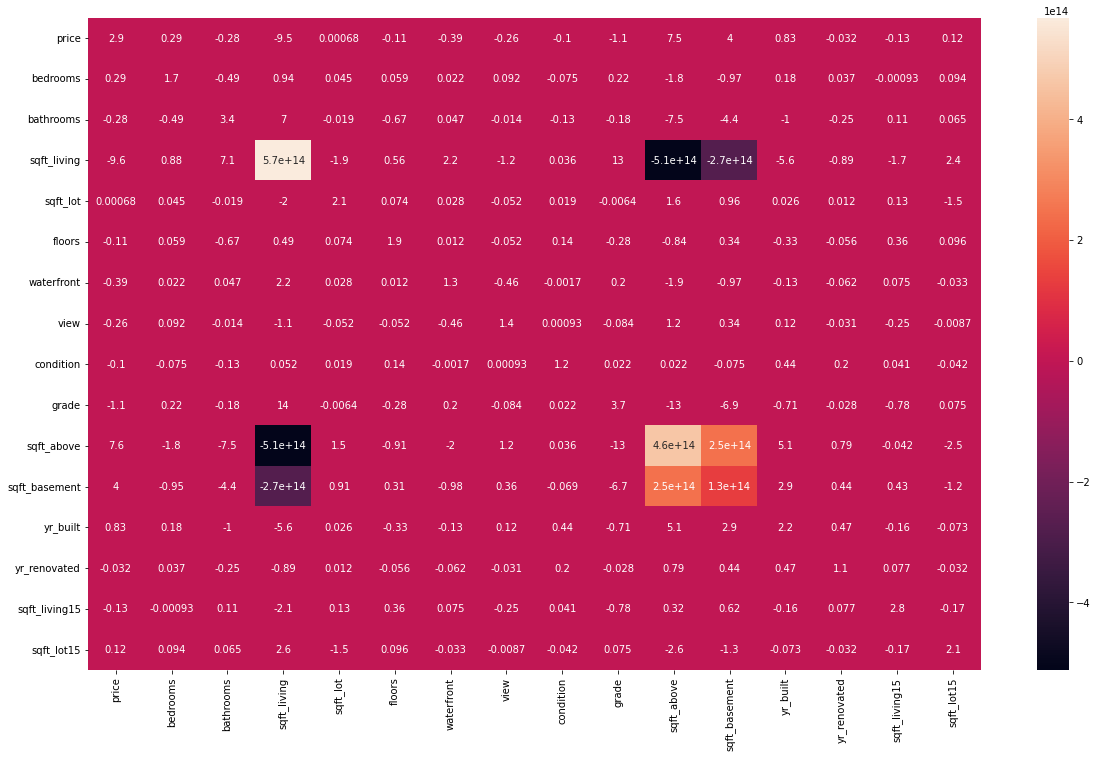

In [32]:
# VIF
plt.figure(figsize = (20, 12))
sns.heatmap(VIF, annot = True)
plt.show()

All scores are less than 5, an indicator for a good scoring. Bathrooms(3.4) and grade(4.4) have the highest VIF scores.

In [33]:
# Multiple regression model 
X = df1.drop(columns=['price'], axis =1)
Y = df1['price']

# Splitting the model into test and train sets

x_test, x_train, y_test, y_train = train_test_split(X, Y, test_size=0.2
                                                    , random_state= 100)

# Fitting the model 
regressor = LinearRegression()
regressor.fit(x_train, y_train)



LinearRegression()

In [34]:
# Making Predictions

y_pred = regressor.predict(x_test)
y_pred

array([305048.82611594, 568410.44347324, 355597.8979474 , ...,
       234261.67966817, 892591.66389735, 447077.79441468])

In [35]:
# Comparing the actual output values for X_test with the predicted values
#
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison.head(10)

,Actual,Predicted
11285,236000.0,305048.826116
3201,710000.0,568410.443473
12131,219950.0,355597.897947
10696,335000.0,444381.542181
13646,418500.0,494457.859906
2952,250750.0,581598.242950
14190,824000.0,298273.747827
19390,620000.0,515048.314657
18091,397000.0,388618.255014
2675,278000.0,335526.204815


There is quite a variation of the actual compare to the predicted, our model may not be perfect to predict the the future prices.

In [36]:
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 142739.58850772202
Mean Squared Error: 46152490035.78996
Root Mean Squared Error: 214831.30599563455


In [37]:
# Test and Training Scores
score1= regressor.score(x_train, y_train)
score2 = regressor.score(x_test, y_test)

print('Training set accuracy: ', '%.5f'%(score1))
print('Test set accuracy: ', '%.5f'%(score2))

Training set accuracy:  0.63439
Test set accuracy:  0.65440


The linear model will have a 65.44% accuracy for future predictions, which is just about decent.

In [38]:
# Residuals

residuals = np.subtract(y_pred, y_test)
pd.DataFrame(residuals).describe()

,price
count,1.728500e+04
mean,3.378982e+03
std,2.148109e+05
min,-4.118962e+06
25%,-9.137443e+04
50%,1.110314e+04
75%,1.157428e+05
max,1.319407e+06


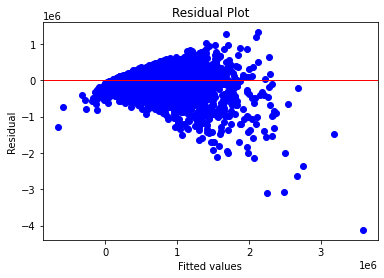

In [39]:
# Residual plot for the Model 

plt.scatter(y_pred, residuals, color='blue')
plt.ylabel('Residual')
plt.xlabel('Fitted values')
plt.title('Residual Plot')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

Most of the residuals value are concentrated near the line of best fit.

In [40]:
# Residual mean
residuals.mean()

3378.9823308699456

#### Critical Value

In [41]:
# Using bartlett's test. 


test_result, p_value = sp.stats.bartlett(y_pred, residuals)
print("Test result:", test_result)
print("P-value:", p_value)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
print(f"The degree of freedom is: {degree_of_freedom}")

# Probability
probability = 1 - p_value
print(f"The probability value is: {probability}")

# Critical Value
critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(f"The critical value is: {critical_value}")

if (test_result > critical_value):
  print("The variances are not equal! Reasses the Model!")
else:
  print("The variances are homogeneous. Fits consideration")

Test result: 1996.7143506498217
P-value: 0.0
The degree of freedom is: 17284
The probability value is: 1.0
The critical value is: inf
The variances are homogeneous. Fits consideration


### Ridge Regression

In [42]:
# Building the Ridge Regression model

ridge = Ridge()
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [43]:
# Cross validation
folds = 10
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(x_train, y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [44]:
print(ridge_model_cv.best_params_)
print(ridge_model_cv.best_score_)

{'alpha': 4.0}
-143993.27424273442


The best alpha is 4.0

In [45]:
alpha = 4
ridge = Ridge(alpha=alpha)

ridge.fit(x_train, y_train)

Ridge(alpha=4)

In [46]:
print("Training set score: {:.5f}".format(ridge.score(x_train, y_train)))
print("Test set score: {:.5f}".format(ridge.score(x_test, y_test)))

Training set score: 0.63418
Test set score: 0.65310


### Lasso Regression

In [47]:
# Building our Lasso Regression model

lasso = Lasso()
folds = 10

In [48]:
# Cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(x_train, y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [49]:
print(lasso_model_cv.best_params_)
print(lasso_model_cv.best_score_)

{'alpha': 50}
-144042.31971570823


The best alpha is 50

In [50]:
alpha =50

lasso = Lasso(alpha=alpha)
        
lasso.fit(x_train, y_train)

Lasso(alpha=50)

In [51]:
print("Training set score: {:.5f}".format(lasso.score(x_train, y_train)))
print("Test set score: {:.5f}".format(lasso.score(x_test, y_test)))

Training set score: 0.63439
Test set score: 0.65424


### Quantile Regression

In [52]:
# Building the Quantile Regression model


sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)
sc = StandardScaler()
y_train1 = sc.fit_transform(y_train.values.reshape(-1,1))
y_test1 = sc.transform(y_test.values.reshape(-1,1))

In [53]:
pca = PCA(n_components = 5)
principalComponents = pca.fit_transform(x_train)
principalComponentsTest = pca.transform(x_test)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PrincComp_1', 'PrincComp_2','PrincComp_3','PrincComp_4','PrincComp_5'])
principalDftest = pd.DataFrame(data = principalComponentsTest
             , columns = ['PrincComp_1', 'PrincComp_2','PrincComp_3','PrincComp_4','PrincComp_5'])

In [54]:
principalDf['price'] = y_train1

In [55]:
mod = sm.quantreg('price ~ PrincComp_1 + PrincComp_2 + PrincComp_3 + PrincComp_4 + PrincComp_5', principalDf)
res = mod.fit(q=.7)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.3168
Model:                       QuantReg   Bandwidth:                      0.1272
Method:                 Least Squares   Sparsity:                        1.378
Date:                Sat, 12 Feb 2022   No. Observations:                 4322
Time:                        19:58:29   Df Residuals:                     4316
                                        Df Model:                            5
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.1714      0.010     17.835      0.000       0.153       0.190
PrincComp_1  2.673e-06   2.83e-07      9.456      0.000    2.12e-06    3.23e-06
PrincComp_2 -1.268e-06   9.82e-07     -1.292      0.196   -3.19e-06    6.56e-07
PrincComp_3     0.0005   8.12e-06     56.924   

### Elastic Net Regression

In [56]:
# Building the elastic net regression model

elastic = ElasticNet()
folds = 10

In [57]:
# Cross validation
elastic_model_cv = GridSearchCV(estimator = elastic, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

elastic_model_cv.fit(x_train, y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [58]:
# Fitting the model into the elastic regression

print(elastic_model_cv.best_params_)
print(elastic_model_cv.best_score_)

{'alpha': 0.01}
-144004.6283667656


In [59]:
alpha = 0.01
elastic = ElasticNet(alpha=alpha)

elastic.fit(x_train, y_train)

ElasticNet(alpha=0.01)

In [60]:
print("Training set score: {:.5f}".format(elastic.score(x_train, y_train)))
print("Test set score: {:.5f}".format(elastic.score(x_test, y_test)))

Training set score: 0.63236
Test set score: 0.64819


## 6.0 Conclusion

The Elastic Model had a score of 0.64819 which 64.82% accurate, Lasso Regression had a score of 0.65424 that is 65.42% accurate , Ridge had a score of 0.65310 which is 65.31% and quantile regression had a score of  0.3168 which is 31.68% accurate. Amongst the four regression models, Lass model revealed a better fit for the model having the highest score.

#### Follow up questions

Did we have the right data?

Yes. though the prediction score wasn't entirely accurate, this can be solved using optimization techniques

Do we need other data to answer our question?

Probably more data needs to be sought so as to improve the model and provide meaningful predictions.

Did we have the right question?

Yes.